In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']= (10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

In [6]:
df= pd.read_csv(r'C:\Users\VIKAS\Desktop\world-happiness-report-2021.csv'
)
df.head()

AttributeError: module 'pandas' has no attribute 'read_csv'

In [4]:
data= df[['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]

In [5]:
data

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [10]:
data_new = data.rename({
    'Country name':'country_name',
    'Regional Indicator':'regional_indicator',
    'Ladder score':'happiness_score',
    'Logged GDP per capita':'logged_gdp_per_capita',
    'Social support':'social_support',
    'Healthy life expectancy':'healthy_life_expectancy',
    'Freedom to make life choices':'freedom_to_make_choices',
    'Generosity':'generosity',
    'Perceptions of corruption':'perceptions_of_corruption'
    })

In [12]:
data_new.head()

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [16]:
data.isnull().sum()

Country name                    0
Regional indicator              0
Ladder score                    0
Logged GDP per capita           0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

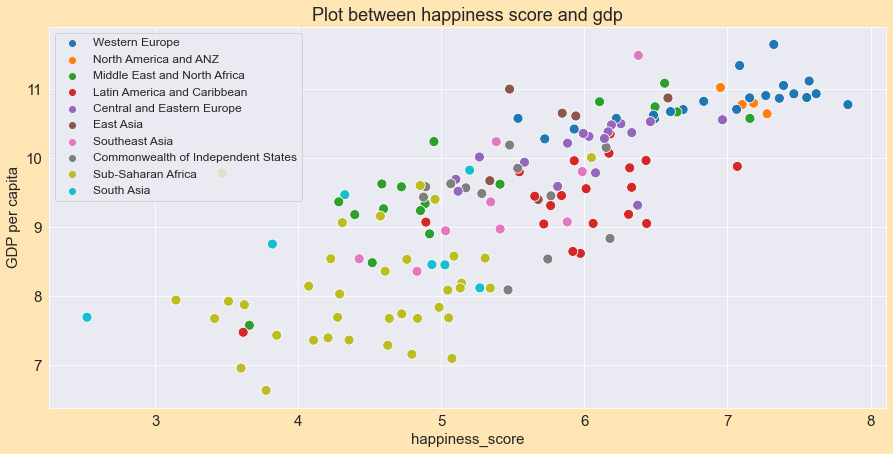

In [64]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Plot between happiness score and gdp')
sns.scatterplot(x='Ladder score',y='Logged GDP per capita',  hue="Regional indicator",data=data, s=100)
plt.legend(loc='upper left',fontsize='12')
plt.xlabel('happiness_score')
plt.ylabel('GDP per capita')

plt.show()

In [69]:
gdp_region= data.groupby('Regional indicator')['Logged GDP per capita'].sum()
gdp_region

Regional indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: Logged GDP per capita, dtype: float64

Text(0, 0.5, '')

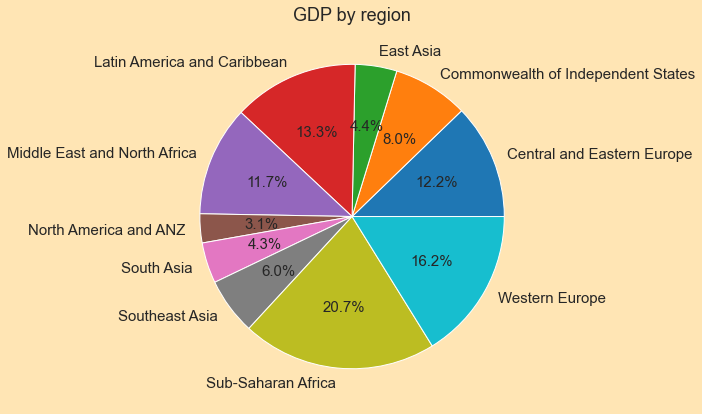

In [71]:
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP by region')
plt.ylabel("")

In [86]:
country_count= data.groupby('Regional indicator')['Country name'].count()
country_count

Regional indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: Country name, dtype: int64

In [ ]:
##correlation map not covered

In [87]:
corruption_region= data.groupby('Regional indicator')['Perceptions of corruption'].sum()
corruption_region

Regional indicator
Central and Eastern Europe            14.459
Commonwealth of Independent States     8.701
East Asia                              4.100
Latin America and Caribbean           15.852
Middle East and North Africa          12.958
North America and ANZ                  1.797
South Asia                             5.582
Southeast Asia                         6.382
Sub-Saharan Africa                    27.574
Western Europe                        10.985
Name: Perceptions of corruption, dtype: float64

Text(0, 0.5, '')

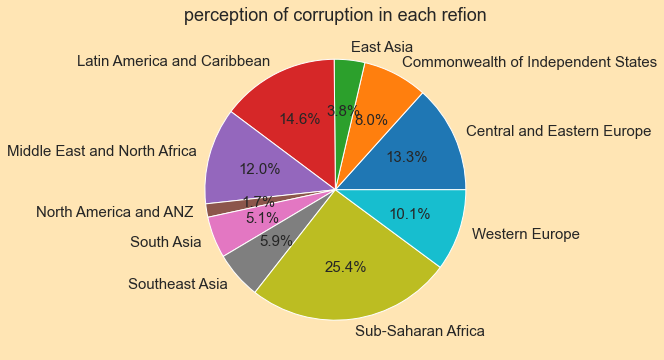

In [98]:
corruption_region.plot.pie(autopct='%1.1f%%')
plt.rcParams['figure.figsize']= (12,8)
plt.title('perception of corruption in each refion')
plt.ylabel("")

In [99]:
top10=data.head(10)
bottom10=data.tail(10)

In [105]:
top10_country=top10['Country name']
top10_life_expectancy=top10['Healthy life expectancy']

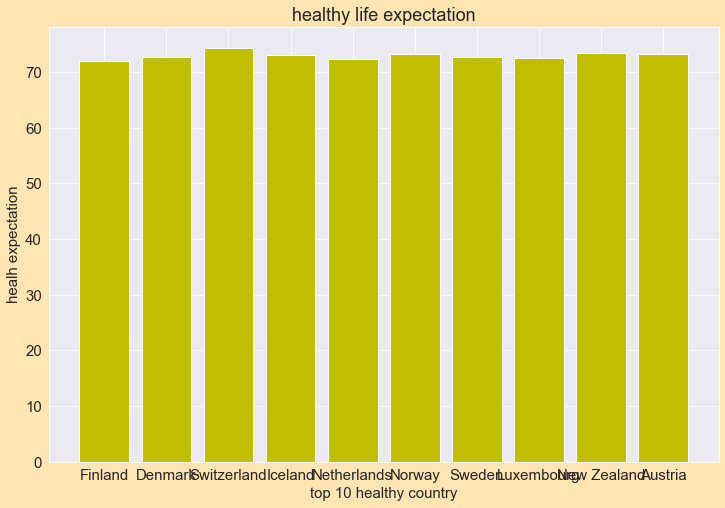

In [102]:
plt.bar(top10_country,top10_life_expectancy,color='y')
plt.title("healthy life expectation")
plt.xlabel("top 10 healthy country")
plt.ylabel("healh expectation")
plt.grid(True)
plt.show()

In [107]:
bottom10_country=bottom10['Country name']
bottom10_life_expectancy=bottom10['Healthy life expectancy']

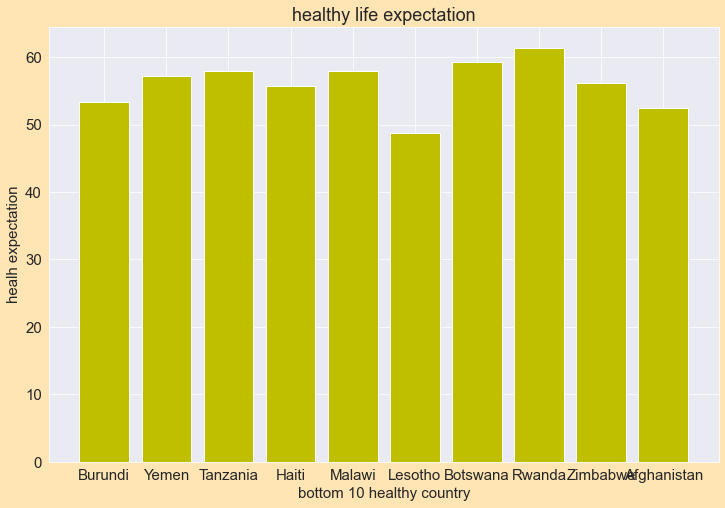

In [108]:
plt.bar(bottom10_country,bottom10_life_expectancy,color='y')
plt.title("healthy life expectation")
plt.xlabel("bottom 10 healthy country")
plt.ylabel("healh expectation")
plt.grid(True)
plt.show()

AttributeError: module 'pandas' has no attribute 'read_csv'